<a href="https://colab.research.google.com/github/SenseiBassa/Hydroloan-Loan-Default-Predicition-ML-Model/blob/main/Hydroloan_Fintech_Loan_Default_Predicition_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bassa Joshua Samuel**
---

## **Hydroloan Fintech Loan Default Predicition ML Model**
---


## **Introduction:**

---

Hydroloan, a fintech firm, is transforming the conventional lending sector by provic Using cutting-edge technology and advanced analytics, Hydroloan delivers swift, c loans to both individuals and businesses. With simplified procedures and an easy- quickly apply for and obtain loans within minutes. Hydroloan's interest rates are hi provide flexible reparment options that alleviate the burden of complicated paperw Hydroloan is dedicated to delivering excellent service and assisting borrowers in n objectives.

## **Problem:**

---

Hydroloan, a loan provider, has noticed that several of their customers are failing to make prompt payment of their loans and are in need of a solution.

## **Business goal:**

---

Hydroloan intends to construct a machine learning (ML) model capable of screening customers that are prone to default on their loans. This approach would permit Hydrol risk customers beforehand and take proactive measures to decrease their default

## **Objective:**

To create a Machine Learning model that can effectively anticipate/predict which custon their loans, allowing Hydroloan to proactively decrease their default rate.

In [ ]:
# Import necessary libraries

import pandas as pd #import our dataset and manipulation
import numpy as np # array or list manipulation



import matplotlib.pyplot as plt#creating visuals
import seaborn as sns# visuals



import warnings#remove warnings
warnings.filterwarnings("ignore")



from sklearn.preprocessing import StandardScaler#(x - mean)/standard deviation
from sklearn.model_selection import train_test_split#split dataset



from sklearn.linear_model import LogisticRegression#import the algorithm
data = pd.read_csv('Default-Fin.csv')#import dataset

In [ ]:
#Let's see what we have in the data
data.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [ ]:
data['Defaulted?'].value_counts()#0=not defaulted 1=defaulted

0    9667
1     333
Name: Defaulted?, dtype: int64

In [ ]:
data.shape

(10000, 5)

In [ ]:
data.columns

Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')

In [ ]:
#we don't need the index loaded with the csv
data.drop('Index',axis=1,inplace=True)
data.head(2)

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0


In [ ]:
print('max amount ',data['Bank Balance'].max())
print('min amount ',data['Bank Balance'].min())

max amount  31851.84
min amount  0.0


In [ ]:
data.isna().sum()

Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

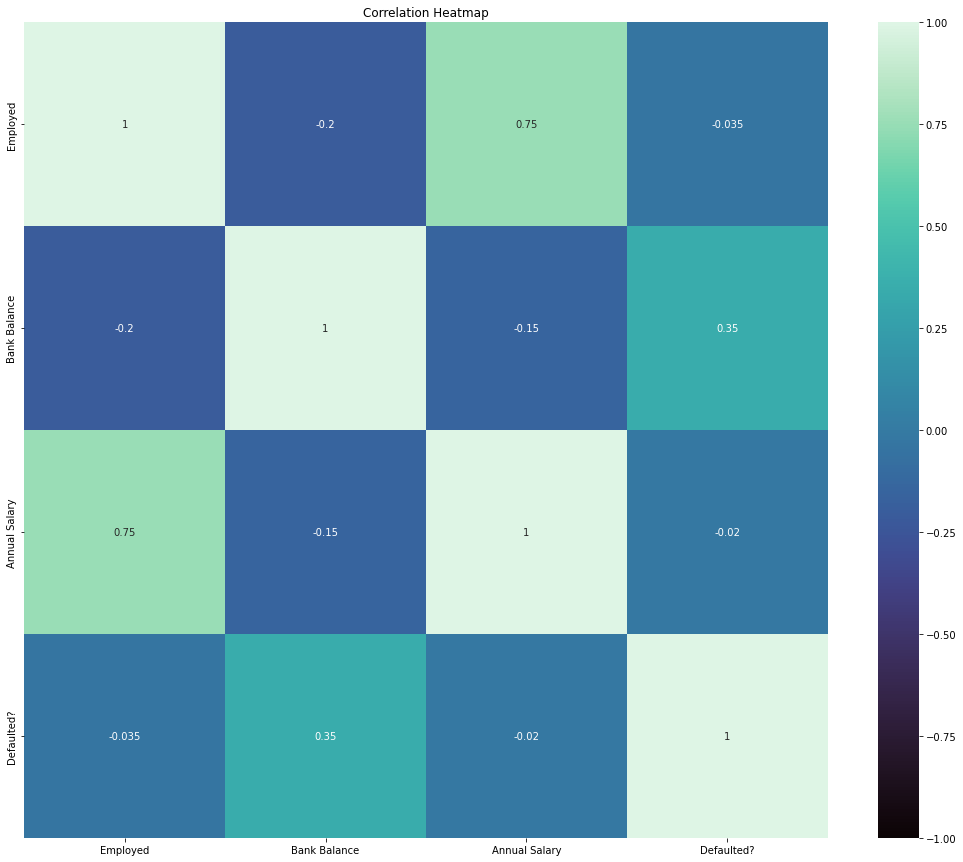

In [ ]:
corr = data.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
X=data[['Employed', 'Bank Balance', 'Annual Salary']]#idenpendent variables
y=data['Defaulted?']#depedent variables

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)#test set is 20%

#### Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split#spliting the dataset
from sklearn.tree import DecisionTreeClassifier#Decision tree algorithm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score#metrics

In [ ]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Training the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: %.2f' % accuracy)
print('Precision: %.2f' % precision)
print('recall: %.2f' % recall)
print('f1: %.2f' % f1)

Accuracy: 0.95
Precision: 0.22
recall: 0.31
f1: 0.26


#### 
Positive= Defaulted = 1<br>
Negative= Not Defaulted = 0<br>

tp= Predicted positive and it is true that is predicted defaulted and it actually defaulted <br>

fp= Predicted positive but it is actually negative that is predicted defaulted but it is actually not defualted <br>

tn= Predicted negative and it is actually negative    that is predicted not defaulted and did not default <br>

fn= Predicted negative and but is actually positive that is predicted not defaulted but the customer actually defaulted <br>



Accuracy=tp+tn/tp+tn+fp+fn <br>
precision=tp/tpfp <br>
recall=tp/tp+fn <br>
f1score=2(precision * Recall)/(precison+Recall)


In [ ]:
#0 is negative (not default) and 1 is positive (default)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1878   63]
 [  41   18]]


In [ ]:
20/(20+62)#tp=20,tn=1876,fp=65,fn=39 0 is negative (not default) and 1 is positive (default)

0.24390243902439024

In [ ]:
20/(20+39)#tp/tp+fn recall

0.3389830508474576

In [ ]:
1879+62+39+20

2000

In [ ]:
(1879+20)/2000

0.9495

In [ ]:
#list(y_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
result=0
for i in range(len(y_test)):
    if list(y_test)[i] == y_pred[i] == 1:
        result += 1

print(result) # 2

18


#### Logistic regression

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create the logistic regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

In [ ]:
#calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

#print the performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1score)

Accuracy: 0.9705
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


In [ ]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    log_reg = LogisticRegression()

# Fit the model to the training data
    log_reg.fit(X_train, y_train)
    
    y_pred = log_reg.predict(X_test)
    #print(precision_score(y_test, y_pred),i)
    scores.append(precision_score(y_test, y_pred))

In [ ]:
np.argmax(scores)

783

In [ ]:
scores[np.argmax(scores)]

0.8

In [ ]:
X_train

,Employed,Bank Balance,Annual Salary
8007,1,8020.80,463649.16
9688,1,11997.96,523933.68
519,0,9654.48,301097.52
3830,1,8095.68,509562.24
4057,0,8072.28,165551.52
...,...,...,...
8409,1,9758.04,591292.56
7583,1,19304.16,480938.64
8417,1,15537.12,452548.68
5832,1,16271.52,302496.60


In [ ]:
#data scaling steps for train data set
from sklearn.preprocessing import StandardScaler#(x - mean)/standard deviation
scaler = StandardScaler()
X_train_scaled  =scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns = X_train.columns)

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_test.columns)

In [ ]:
#X_train.Employed.unique()

In [ ]:
X_train['Bank Balance'].min()

-1.7399411163505931

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=783)

# Create the logistic regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

In [ ]:
#calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

#print the performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1score)

Accuracy: 0.971
Precision: 0.8
Recall: 0.3157894736842105
F1-Score: 0.45283018867924535
